# Damage Control Prediction

Kyongmin So 

<img src= "./Images/nepal-quake-map-data.jpeg">

## Data Understanding
-------------------------

In April 2015, an earthquake (also known as the **Gorkha Earthquake**) hit central Nepal with a magnitude of 7.8. It killed an estimate of 9 thousand people and injured more than 20 thousand people. It was the worst natural disaster to hit Nepal since the 1930's. 

This earthquake flattened out countless villages and communities throughtout Nepal. Nepal is already one of the poorest Asian countries with a GDP of about $20 billion dollars and had no abilities to reconstruct themselves needing to rely on foreign aid to get back up on their feet. This country was absolutely not prepared for this catastrophe and they paid massively for their consequences for not being prepared.


Something that intrigued me was that that 2 years prior to the earthquake in 2013, a seismologist named Vinod Kumar Gaur was interviewed and he was quoted saying: "Calculations show that there is sufficient accumulated energy, now to produce an 8 magnitude earthquake. I cannot say when. It may not happen tomorrow, but it could possibly happen sometime this century, or wait longer to produce a much larger one." 

People were aware of the earthquake but they were confident that the earthquake wouldn't happen for a long time and the people of Nepal eventually paid the price for it. Part of the reason why I was so interested in doing this is to see what the buildings were made out of and see if there are any connections to the damage of the building and the material used to construct the buildings. Hopefully with my studies,I can figure out what building materials are detrimental in earthquakes, and make sure that any other buildings made of the same material are documented and are best restructured so that the damage when an earthquake happens the aftermath will not be that detrimental.

All of my data was obtained through this [website](https://www.drivendata.org/competitions/57/nepal-earthquake/) but you will need an account to access the information. I will not use all the features and if I start dropping anything, I will explain why I dropped certain features.

[Source](https://en.wikipedia.org/wiki/April_2015_Nepal_earthquake)


**Something to know**

This data is based off of damages from an earthquake that was registered at a 7.8 ~ 8.0 earthquake and the Richter Scale max is 8.8 or 8.9 (depending on who you ask). My model will predict off of earthquakes that are on the more severe and dangerous side of the scale so my findings will be based off of earthquakes that are stronger than 7.0. 

**Scoring Metrics**

I am predicting the level of damage from a scale of 1 to 3. The level of damage is an ordinal so that means the order matters. This can be viewed as a classification or an ordinal regression problem.

We will be using the the F1 score which balances the precision and recall of a classifier. Normally we use the F1 score for binary situations but since we have three labels we are dealing with, we will be using the **micro** averaged F1 score.

## Business Problem:
----------------------------------------------------------------------------
My model is predicting which homes in Nepal will receive the worst damages from an earthquake based off of what materials they are made out of. This is so the government and different organizations can be aware of what homes to go out and try to restructure the homes so when an earthquake does happen, we will not have to worry about it.  

# 1. Data Cleaning

Making our necessary imports.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.metrics import plot_confusion_matrix, f1_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict, cross_validate
import xgboost
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib
from functions import * 

**Disclaimer**
The functions in the functions python file were created by [Saad Saeed](https://github.com/ssaeed85/dsc-ph3-TanzaniaWaterWell/blob/main/Notebook_Modeling.ipynb).

Let's dig into the data!

# Data Exploration

In [2]:
#Target isn't in this specific dataframe. 
df = pd.read_csv('Data/train_values (2).csv')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Dropping the building ID column because we already got the same 
#column name in the main dataframe. 
target = pd.read_csv('Data/train_labels (1).csv')
target = target.drop(columns='building_id')
target

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


In [4]:
#I now want to combine the main dataframe with the target just so I can 
#get a better visualization of what I am working with.
dataframes = [df, target]

#We are going to be combining our two dataframes off of our columns
combined_df = pd.concat(dataframes, axis = 1)
combined_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [5]:
#Making sure whatever is in our columns matches the type they're 
#supposed to be.
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Now that I have combined our dataframe, I now want to see if there are any null values.

In [6]:
combined_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

We noticed that there were no null values which is a huge relief, but there are features that we need explore. For sure we will not have to use all of these features, so we need to know what to keep, and what to drop. 

### Duplicates

Something I noticed that I forgot to check was to see if I had any duplicates in my data or not. I wanted to check to see if I had any duplicates using the **building_id** column. 

In [7]:
combined_df[combined_df['building_id'].duplicated()]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade


It seems like I don't have any duplicates, but to double check, I wanted to check and see if all the ID's are unique values. The number should match the rows of our dataframe, which is 260,601. 

In [8]:
len(combined_df['building_id'].unique())

260601

Perfect! No duplicates and all of my rows are unique!

### Categorizing my column

An important feature for me to use is the **age** columns. Let me see what I am working with.

In [9]:
combined_df['age'].unique()

array([ 30,  10,  25,   0,  15,  20,  45,  55,   5,  40,  80,  60,  35,
        70,  50,  65, 100,  75,  85, 190, 995, 105,  90, 120,  95, 110,
       115, 150, 200, 130, 125, 140, 155, 160, 175, 135, 145, 195, 180,
       165, 170, 185])

It looks like that my **age** column has already been put into bins, but they look a little too spread out.

,Number,Percentage
,,
Zeroes,"26,041",9.99 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,42,0.02 %
Mean,26.54,-
Median,15.00,-


,Value Count,% Value Count
10,38896,14.925499
15,36010,13.818059
5,33697,12.930495
20,32182,12.349147
0,26041,9.992671
25,24366,9.349926
30,18028,6.917855
35,10710,4.109731
40,10559,4.051788
50,7257,2.784717


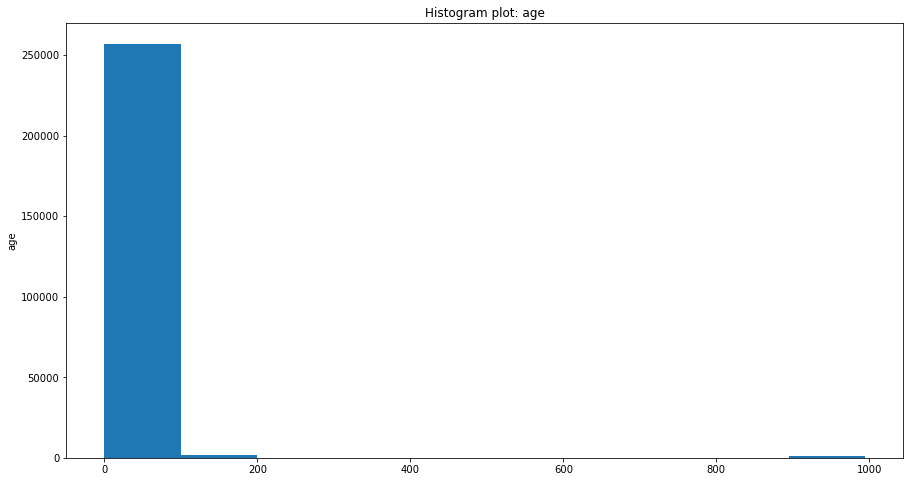

In [10]:
colInfo(combined_df['age'])

### Feature Exploration

In [11]:
#Pulling up our dataframe to see again
combined_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


The following heatmap was discovered by me and a fellow cohort-mate [Xiaohua Su](https://github.com/xiaohua-su). This is a specific heatmap that looks up the correlation between the categorical data.

In [12]:
#Gathering our categorical data because that is what we will be using for this project.
data_types = {'geo_level_1_id': 'categorical',
              'land_surface_condition' : 'categorical',
             'foundation_type':'categorical',
             'geo_level_2_id':'categorical',
             'geo_level_3_id':'categorical',
             'roof_type':'categorical',
             'ground_floor_type':'categorical',
             'other_floor_type':'categorical',
             'position':'categorical',
             'plan_configuration':'categorical',
             'has_superstructure_adobe_mud':'categorical',
             'has_superstructure_mud_mortar_stone':'categorical',
             'has_superstructure_stone_flag':'categorical',
             'has_superstructure_cement_mortar_stone':'categorical',
             'has_superstructure_mud_mortar_brick':'categorical',
             'has_superstructure_cement_mortar_brick':'categorical',
             'has_superstructure_timber':'categorical',
             'has_superstructure_bamboo':'categorical',
             'has_superstructure_rc_non_engineered':'categorical',
             'has_superstructure_rc_engineered':'categorical',
             'has_superstructure_other':'categorical',
             'legal_ownership_status':'categorical',
             'has_secondary_use':'categorical',
             'has_secondary_use_agriculture':'categorical',
             'has_secondary_use_hotel':'categorical',
              'has_secondary_use_rental':'categorical', 
              'has_secondary_use_institution':'categorical',
              'has_secondary_use_school':'categorical',
              'has_secondary_use_industry':'categorical',
              'has_secondary_use_health_post':'categorical',
              'has_secondary_use_gov_office':'categorical',
            'has_secondary_use_use_police':'categorical',
            'has_secondary_use_other':'categorical',
              'damage_grade':'categorical'

             
             
             }

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in data.columns]
interval_cols

[]

In [13]:
phik_overview = combined_df.phik_matrix(interval_cols = interval_cols)
phik_overview.round(2)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable building_id is large: 260601. Are you sure this is not an interval variable? Analysis for pairs of variables including building_id can be slow.
  warnings.warn(
/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable geo_level_2_id is large: 1414. Are you sure this is not an interval variable? Analysis for pairs of variables including geo_level_2_id can be slow.
  warnings.warn(
/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable geo_level_3_id is large: 11595. Are you sure this is not an interval variable? Analysis for pairs of variables including geo_level_3_id can be slow.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#Pulling up our heatmap!
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Greens', 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(32, 20))
plt.tight_layout()

decades 
half century 
100 + 
histogram for skewness

In [ ]:
colInfo(combined_df['age'])

### Starting to drop our columns

I want to focus on building a model that predicts building damages based off of what the structures are made out of. Therefore, I will drop some columns that that has no connection to the building materials. This will the be the main reasons as to why I will drop some of my columns.

I got my data from this [website](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/). In this site, it gives us the details for every feature and I need to start determining if each feature is worth keeping or not. 

The website is useful, but it did not go into full detail on what some of the features were. The geo_level columns were one of the examples that I had an issue because what constituted the difference between **geo_level_1_id**	& **geo_level_2_id**? This [website](https://becominghuman.ai/how-to-shine-in-a-data-science-challenge-an-example-from-drivendata-47a526fa38ea) did a better job of explaining the different geo levels. 

From my research: 
- geo_level_1_id
    - City
- geo_level_2_id
    - District
- geo_level_3_id
    - Neighborhood

This was the best explanation I could find on these certain columns. I will be dropping **geo_level_2_id** and **geo_level_3_id**. These columns will be part of the **next step** for me and hopefully I will be able to figure out the locations and names for this column.

In [14]:
#I will be dropping geo_level_2, and geo_level_3

combined_df = combined_df.drop(columns=['geo_level_2_id', 'geo_level_3_id'])
combined_df

,building_id,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,2,30,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,2,10,8,7,o,r,n,x,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,2,10,5,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,2,10,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,3,30,8,9,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1,55,6,3,n,r,n,f,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,2,0,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,3,55,6,7,t,r,q,f,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,2,10,14,6,t,r,x,v,...,0,0,0,0,0,0,0,0,0,2


I am going to start dropping more features. 

I could not find any information on the **area_percentage** nor the **height_percentage** so I dropped those features. I also dropped the **count_families** because knowing how many families live in the building is unnecessary, and same with the **count_floors_pre_eq** because knowing the count of floors isn't important.  

In [15]:
#Dropping some more columns!
combined_df = combined_df.drop(columns=['area_percentage', 'height_percentage','count_families', 
                                        'count_floors_pre_eq'])
combined_df

,building_id,geo_level_1_id,age,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,30,t,r,n,f,q,t,d,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,10,o,r,n,x,q,s,d,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,10,t,r,n,f,x,t,d,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,10,t,r,n,f,x,s,d,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,30,t,r,n,f,x,s,d,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,55,n,r,n,f,j,s,q,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,0,t,r,n,f,q,s,d,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,55,t,r,q,f,q,s,d,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,10,t,r,x,v,s,j,d,...,0,0,0,0,0,0,0,0,0,2


Bringing back the updated heatmap!

There are columns that show us the secondary uses for the buildings that  I have no use for. It just states what the building was used for. I have no interest in keeping those columns so I will be dropping them.

In [16]:
#Dropping all of the secondary usage columns.
combined_df = combined_df.drop(columns=['has_secondary_use', 
                                        'has_secondary_use_agriculture',
                                        'has_secondary_use_hotel', 
                                        'has_secondary_use_rental',
                                       'has_secondary_use_institution', 
                                       'has_secondary_use_school',
                                       'has_secondary_use_industry', 
                                       'has_secondary_use_health_post',
                                       'has_secondary_use_gov_office', 
                                       'has_secondary_use_use_police', 
                                       'has_secondary_use_other'])
combined_df

,building_id,geo_level_1_id,age,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,damage_grade
0,802906,6,30,t,r,n,f,q,t,d,...,0,0,0,0,0,0,0,0,v,3
1,28830,8,10,o,r,n,x,q,s,d,...,0,0,0,0,0,0,0,0,v,2
2,94947,21,10,t,r,n,f,x,t,d,...,0,0,0,0,0,0,0,0,v,3
3,590882,22,10,t,r,n,f,x,s,d,...,0,0,0,1,1,0,0,0,v,2
4,201944,11,30,t,r,n,f,x,s,d,...,0,0,0,0,0,0,0,0,v,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,55,n,r,n,f,j,s,q,...,0,0,0,0,0,0,0,0,v,2
260597,669485,17,0,t,r,n,f,q,s,d,...,0,0,0,0,0,0,0,0,v,3
260598,602512,17,55,t,r,q,f,q,s,d,...,0,0,0,0,0,0,0,0,v,3
260599,151409,26,10,t,r,x,v,s,j,d,...,0,0,1,0,0,0,0,0,v,2


Looking at my **age**, I am going to just drop this feature because I believe it won't help me with my data.

In [17]:
combined_df = combined_df.drop(columns='age')
combined_df

,building_id,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,damage_grade
0,802906,6,t,r,n,f,q,t,d,1,...,0,0,0,0,0,0,0,0,v,3
1,28830,8,o,r,n,x,q,s,d,0,...,0,0,0,0,0,0,0,0,v,2
2,94947,21,t,r,n,f,x,t,d,0,...,0,0,0,0,0,0,0,0,v,3
3,590882,22,t,r,n,f,x,s,d,0,...,0,0,0,1,1,0,0,0,v,2
4,201944,11,t,r,n,f,x,s,d,1,...,0,0,0,0,0,0,0,0,v,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,n,r,n,f,j,s,q,0,...,0,0,0,0,0,0,0,0,v,2
260597,669485,17,t,r,n,f,q,s,d,0,...,0,0,0,0,0,0,0,0,v,3
260598,602512,17,t,r,q,f,q,s,d,0,...,0,0,0,0,0,0,0,0,v,3
260599,151409,26,t,r,x,v,s,j,d,0,...,0,0,1,0,0,0,0,0,v,2


We dropped the features but now I am running into another problem. Some of the features listed have characters listed for their values. I know I will need to one hot encode these laters, but for now I need to rewrite these single letter characters into actual words.

In [18]:
#Let's start with our first column and see what the letters we are dealing with.

combined_df['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [19]:
#We are now looking into the foundation types.
combined_df['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [20]:
#We are now looking into the roof types. 
combined_df['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

This is obviously going to be a lot harder than I thought. I ended up Googling to see if I could find the answers for these single letters and I found a separate dataset that contained the types of many of the features that I was looking for. I got these datasets from this [website](https://eq2015.npc.gov.np/#/download) using the buildings dataset. 

In [21]:
#Bringing in our new dataframe to compare building,foundation, and roof types.
building_df = pd.read_csv('Data/csv_building_structure.csv')
pd.set_option('display.max_columns', 50)
building_df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


We got our two dataframes to see if I can change the names of the single alphabet to words, I am doing a sanity check to see what I am working with. 

In [22]:
building_df['foundation_type'].value_counts().keys().to_list()

['Mud mortar-Stone/Brick',
 'Bamboo/Timber',
 'Cement-Stone/Brick',
 'RC',
 'Other']

In [23]:
combined_df['foundation_type'].value_counts().keys().to_list()

['r', 'w', 'u', 'i', 'h']

The **foundation_type** did not help me at all. At least the the number of keys match for both columns, but so far I got nothing for this column.

We are going to check the **ground_floor_type** to see if there is any correlation between the different dataframes. 

In [24]:
building_df['ground_floor_type'].value_counts().keys().to_list()

['Mud', 'RC', 'Brick/Stone', 'Timber', 'Other']

In [25]:
combined_df['ground_floor_type'].value_counts().keys().to_list()

['f', 'x', 'v', 'z', 'm']

Same thing like **foundation_type**, **ground_floor_type** is difficult to intrepret. Let me look at other features and see if there is any intrepretability. 

We are going to be checking **land_surface_condition** to see if I can translate the data.

In [26]:
building_df['land_surface_condition'].value_counts().keys().to_list()

['Flat', 'Moderate slope', 'Steep slope']

In [27]:
combined_df['land_surface_condition'].value_counts().keys().to_list()

['t', 'n', 'o']

Okay, I got no luck with **land_surface_condition** either. 

I came to a realization that this extra dataframe (**building_df**) is no help to me. It's great to see what the values of the features are, but there is no way for me to connect the two dataframes together. Overall, I'm back to where I started and I will have to move on with what I know. Features such as **foundation_type** and **land_surface_condition** are absolutely vital, so I won't be dropping them, but I will have to deal with the single lettered words in my columns. Figuring out what each string characters will be part of the **next steps** as well because I will need more time to research what the individual strings are.

Going back, let's see where we are again with our dataframe.

In [28]:
combined_df

,building_id,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,damage_grade
0,802906,6,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,3
1,28830,8,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,2
2,94947,21,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,3
3,590882,22,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,2
4,201944,11,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,2
260597,669485,17,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,3
260598,602512,17,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,3
260599,151409,26,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,2


Since we're back to our original dataframe, I will need to do one more run through and figure out what I do not need. Below is the reason why I dropped my features:

- **building_id**
    - I am dropping the building_id because a unique identifier won't protect certain buildings from disasters.
- **other_floor_type** 
    - This is describing the other floor types besides the ground floors and I do not need that data because the ground floor is what matters the most in an earthquake.
- **position**
    - I had no idea what to do with this column because it's the position of the homes. 
- **plan_configuration**
    - This is the building configuration. I do not need this column either because specific building configurations will not protect you. 
- **legal_ownership_status**
    - I do not care about the ownership status of the buildings. Ownership status does not protect you more from an earthquake.

In [29]:
#I am going to drop more columns that I will not need.
combined_df = combined_df.drop(columns=['building_id', 'other_floor_type', 'position', 
                                        'plan_configuration','legal_ownership_status'])
combined_df

,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,6,t,r,n,f,1,1,0,0,0,0,0,0,0,0,0,3
1,8,o,r,n,x,0,1,0,0,0,0,0,0,0,0,0,2
2,21,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
3,22,t,r,n,f,0,1,0,0,0,0,1,1,0,0,0,2
4,11,t,r,n,f,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,n,r,n,f,0,1,0,0,0,0,0,0,0,0,0,2
260597,17,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
260598,17,t,r,q,f,0,1,0,0,0,0,0,0,0,0,0,3
260599,26,t,r,x,v,0,0,0,0,0,1,0,0,0,0,0,2


### Checking to see if my columns are categorical or not.

It seems like my numbers are not continuous and I need to check to see if my numbers are binary or not. I also need to check and see if my total sum of my binary numbers must equal 260,601 rows. This is to make sure that my categories only have the value of 0 and 1.

In [30]:
#Checking to see if I only have 0 and 1. 
combined_df['has_superstructure_adobe_mud'].value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

In [31]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_adobe_mud'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"237,500",91.14 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.09,-
Median,0.00,-


,Value Count,% Value Count
0,237500,91.135491
1,23101,8.864509


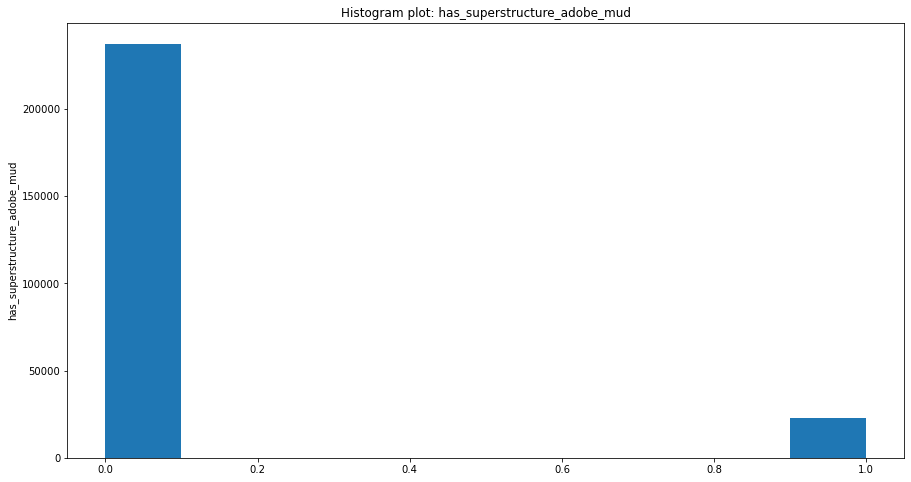

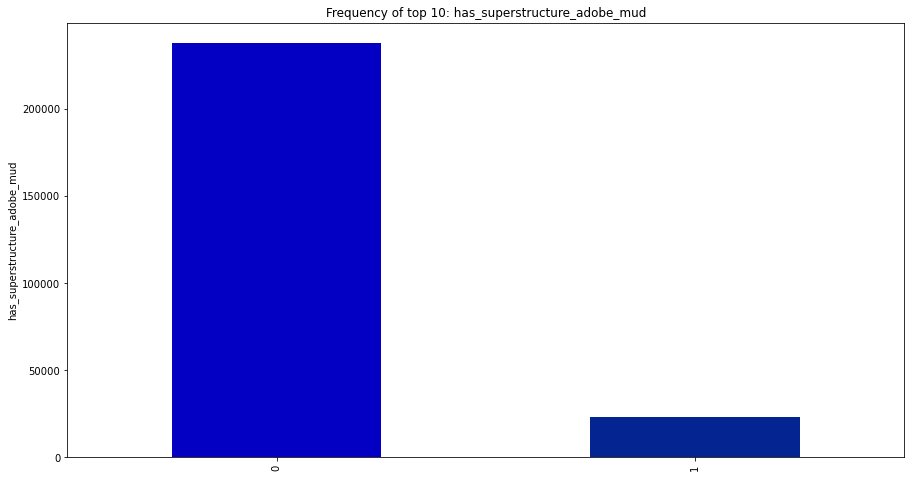

In [32]:
#Just to double check, I will call in my function to make sure this column looks fine. I will be doing 
#this for all of my columns.
colInfo(combined_df['has_superstructure_adobe_mud'])

**has_superstructure_adobe_mud** looks good.

In [33]:
#Checking to see if I only have 0 and 1. 
combined_df['has_superstructure_mud_mortar_stone'].value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [34]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_mud_mortar_stone'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"62,040",23.81 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.76,-
Median,1.00,-


,Value Count,% Value Count
1,198561,76.193491
0,62040,23.806509


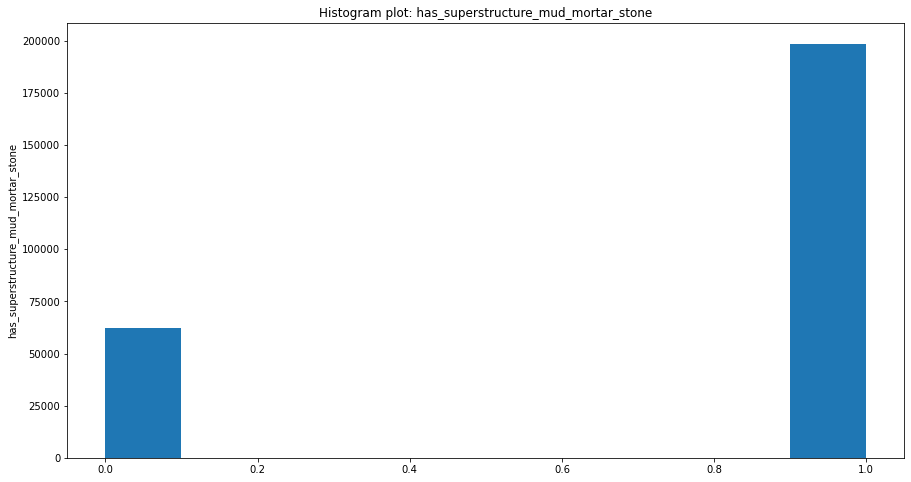

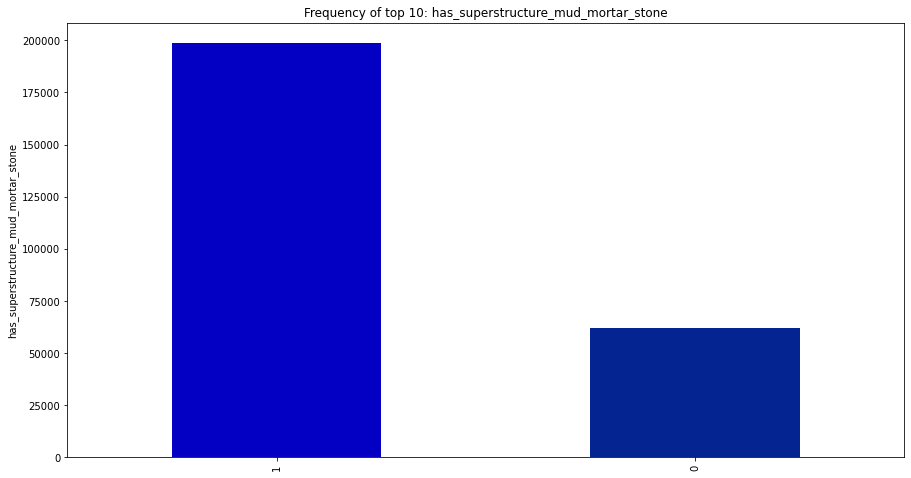

In [35]:
colInfo(combined_df['has_superstructure_mud_mortar_stone'])

**has_superstructure_mud_mortar_stone** looks good.

In [36]:
#Checking to see if I only have 0 and 1. 
combined_df['has_superstructure_stone_flag'].value_counts()

0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

In [37]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_stone_flag'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"251,654",96.57 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.03,-
Median,0.00,-


,Value Count,% Value Count
0,251654,96.566782
1,8947,3.433218


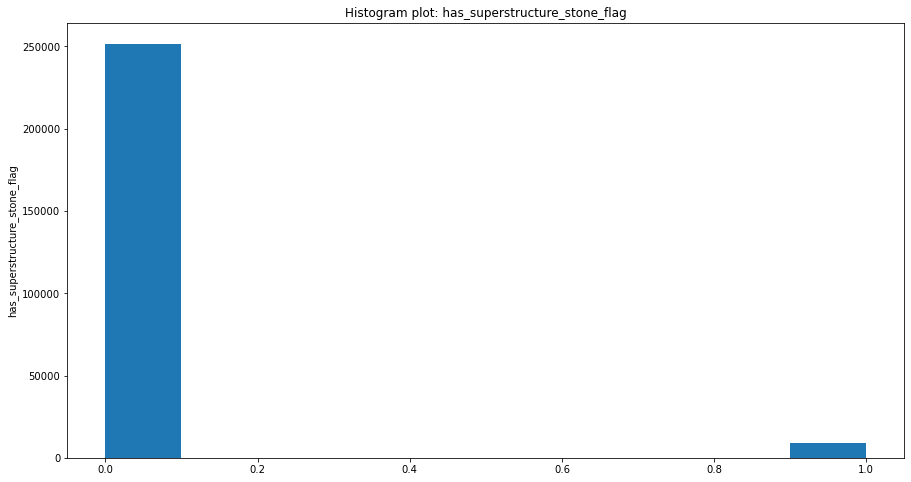

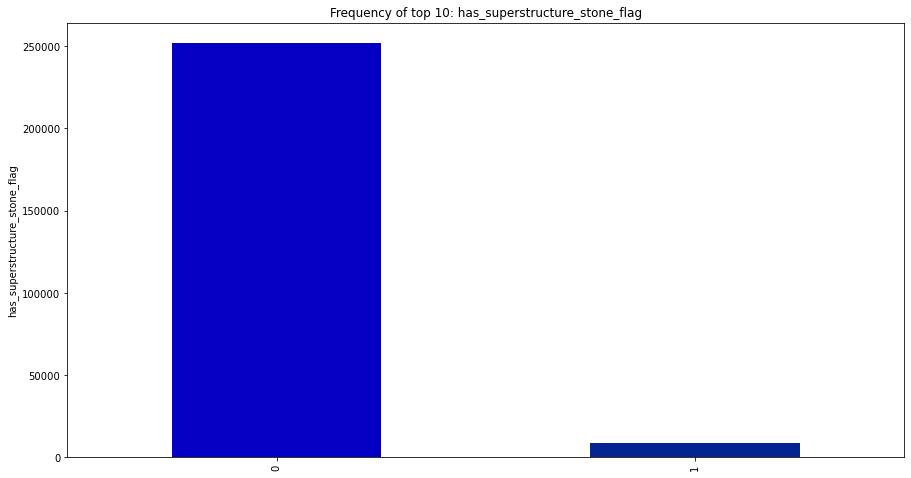

In [38]:
colInfo(combined_df['has_superstructure_stone_flag'])

**has_superstructure_stone_flag** looks good.

In [39]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_cement_mortar_stone'].value_counts()

0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [40]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_cement_mortar_stone'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"255,849",98.18 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.02,-
Median,0.00,-


,Value Count,% Value Count
0,255849,98.176523
1,4752,1.823477


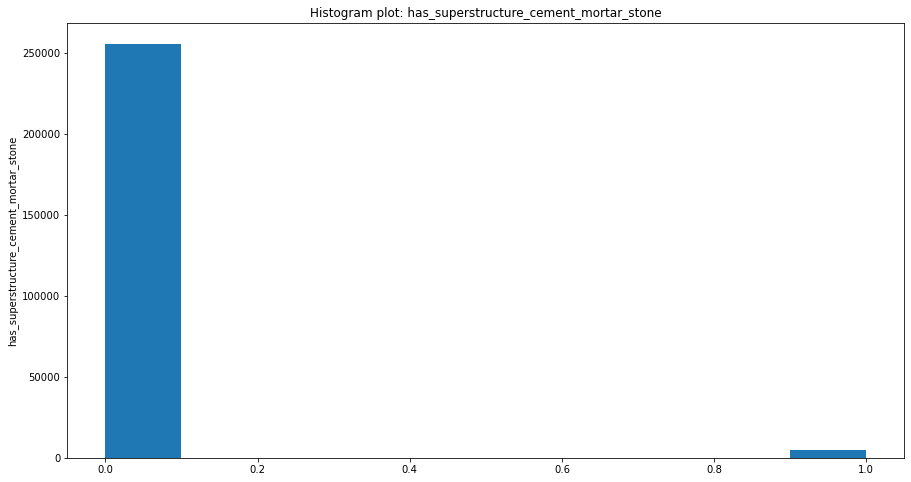

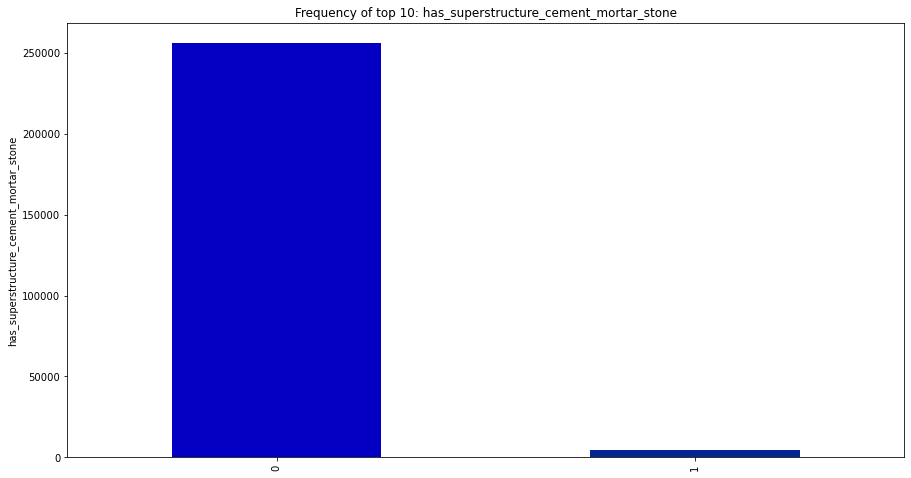

In [41]:
colInfo(combined_df['has_superstructure_cement_mortar_stone'])

**has_superstructure_cement_mortar_stone** looks good.

In [42]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_mud_mortar_brick'].value_counts()

0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

In [43]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_mud_mortar_brick'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"242,840",93.18 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.07,-
Median,0.00,-


,Value Count,% Value Count
0,242840,93.184600
1,17761,6.815400


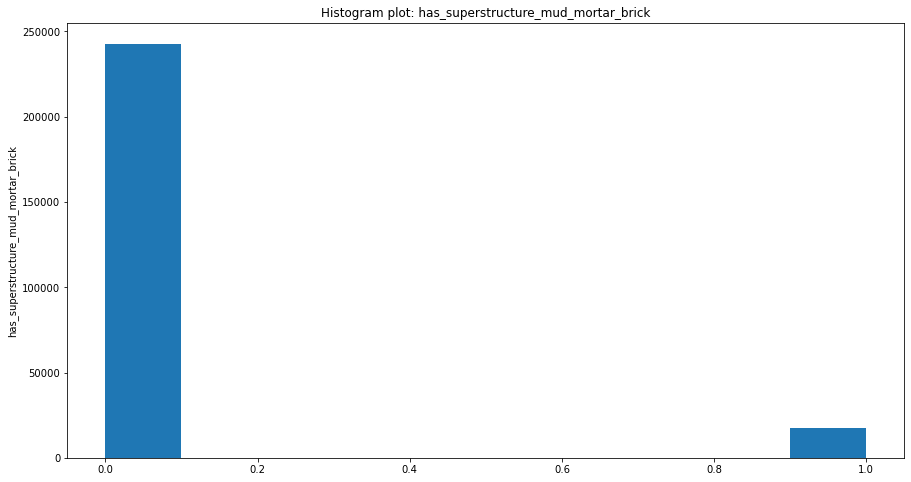

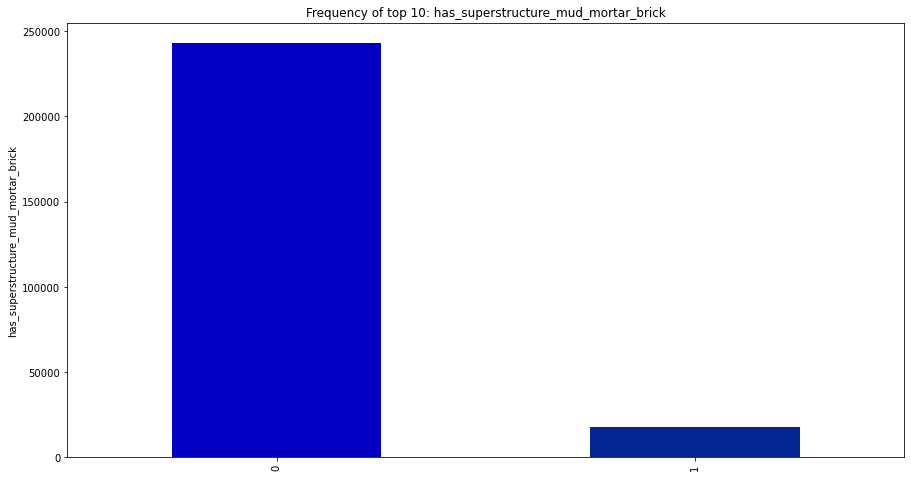

In [44]:
colInfo(combined_df['has_superstructure_mud_mortar_brick'])

**has_superstructure_mud_mortar_brick** looks good.

In [45]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_cement_mortar_brick'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [46]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_cement_mortar_brick'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"240,986",92.47 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.08,-
Median,0.00,-


,Value Count,% Value Count
0,240986,92.473168
1,19615,7.526832


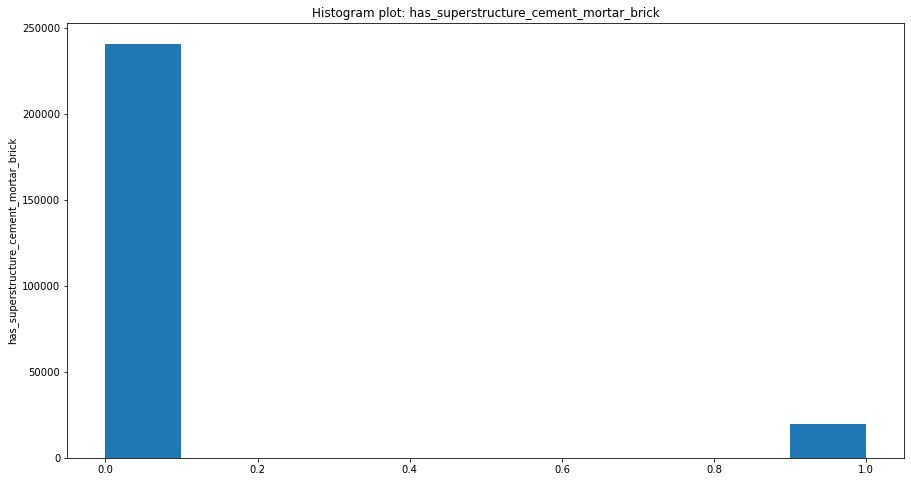

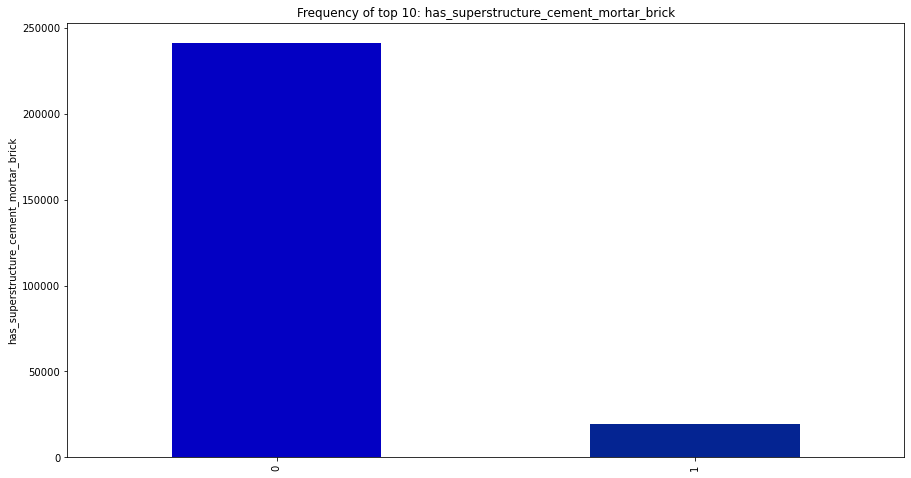

In [47]:
colInfo(combined_df['has_superstructure_cement_mortar_brick'])

**has_superstructure_cement_mortar_brick** looks good.

In [48]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_timber'].value_counts()

0    194151
1     66450
Name: has_superstructure_timber, dtype: int64

In [49]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_timber'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"194,151",74.50 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.25,-
Median,0.00,-


,Value Count,% Value Count
0,194151,74.501249
1,66450,25.498751


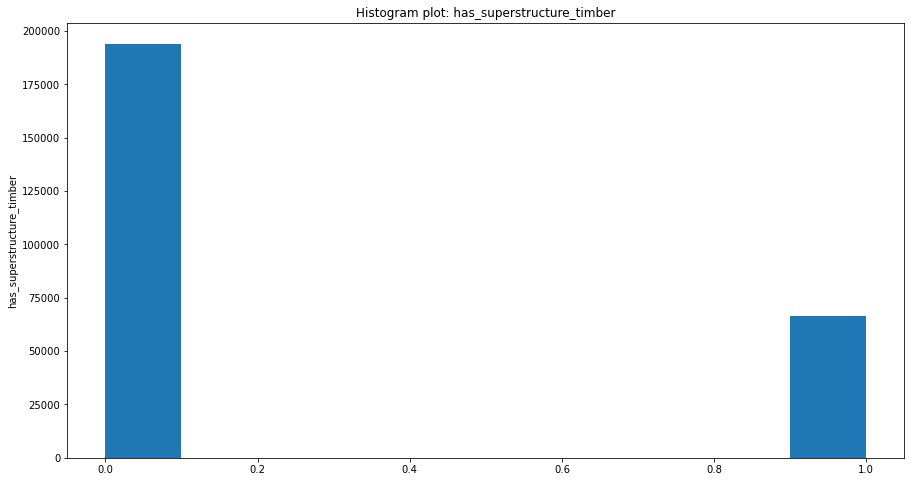

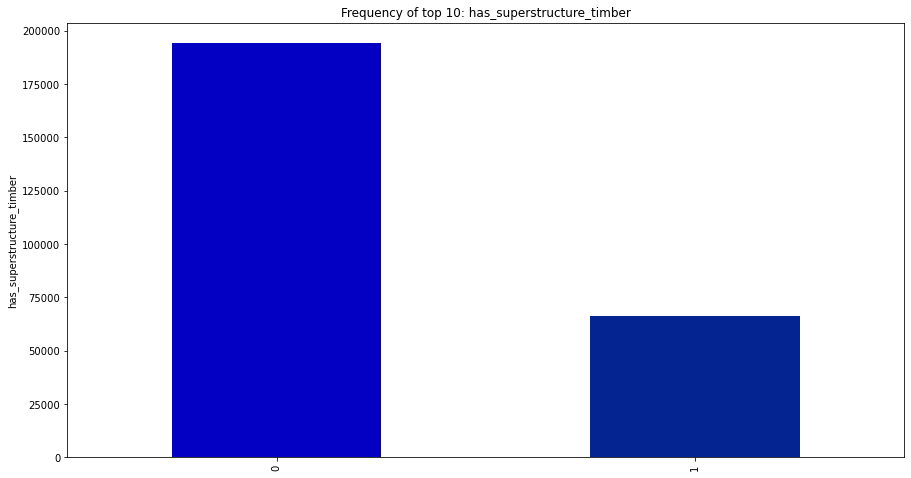

In [50]:
colInfo(combined_df['has_superstructure_timber'])

**has_superstructure_timber** looks good.

In [51]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_bamboo'].value_counts()

0    238447
1     22154
Name: has_superstructure_bamboo, dtype: int64

In [52]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_bamboo'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"238,447",91.50 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.09,-
Median,0.00,-


,Value Count,% Value Count
0,238447,91.498881
1,22154,8.501119


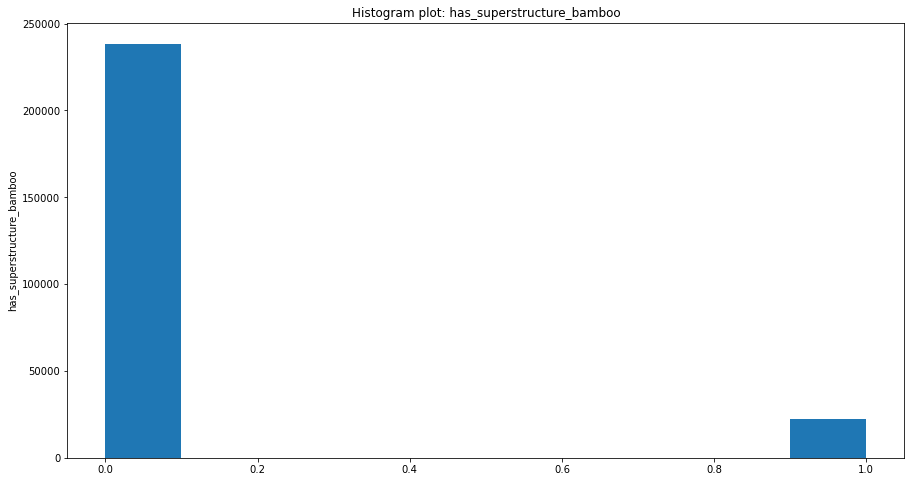

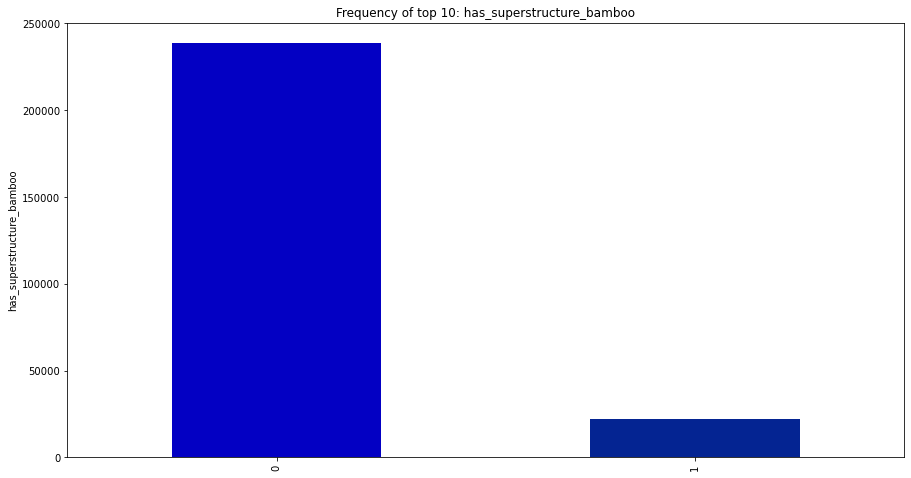

In [53]:
colInfo(combined_df['has_superstructure_bamboo'])

**has_superstructure_bamboo** looks good.

In [54]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_rc_non_engineered'].value_counts()

0    249502
1     11099
Name: has_superstructure_rc_non_engineered, dtype: int64

In [55]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_rc_non_engineered'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"249,502",95.74 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.04,-
Median,0.00,-


,Value Count,% Value Count
0,249502,95.740999
1,11099,4.259001


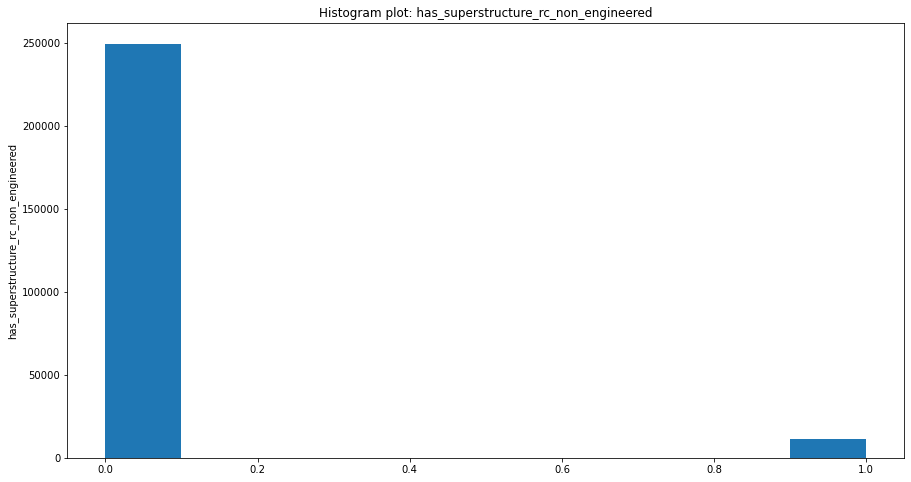

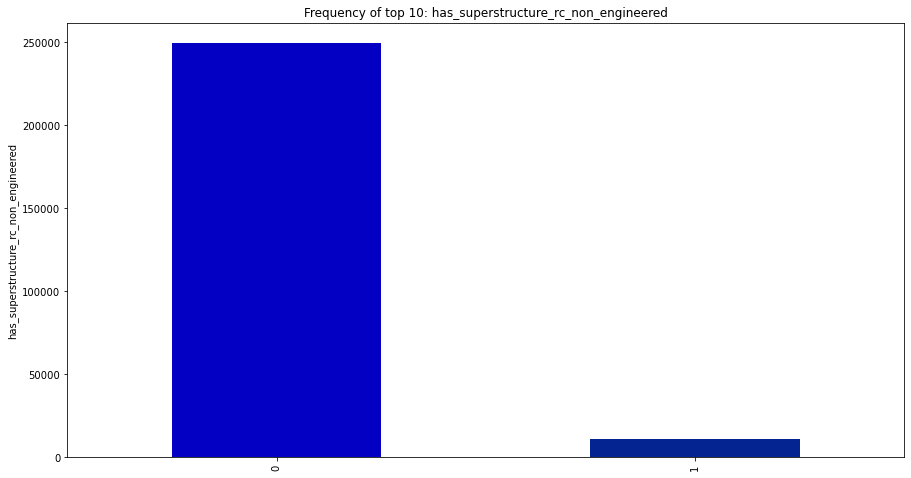

In [56]:
colInfo(combined_df['has_superstructure_rc_non_engineered'])

**has_superstructure_rc_non_engineered** looks good.

In [57]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_rc_engineered'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

In [58]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_rc_engineered'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"256,468",98.41 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.02,-
Median,0.00,-


,Value Count,% Value Count
0,256468,98.414051
1,4133,1.585949


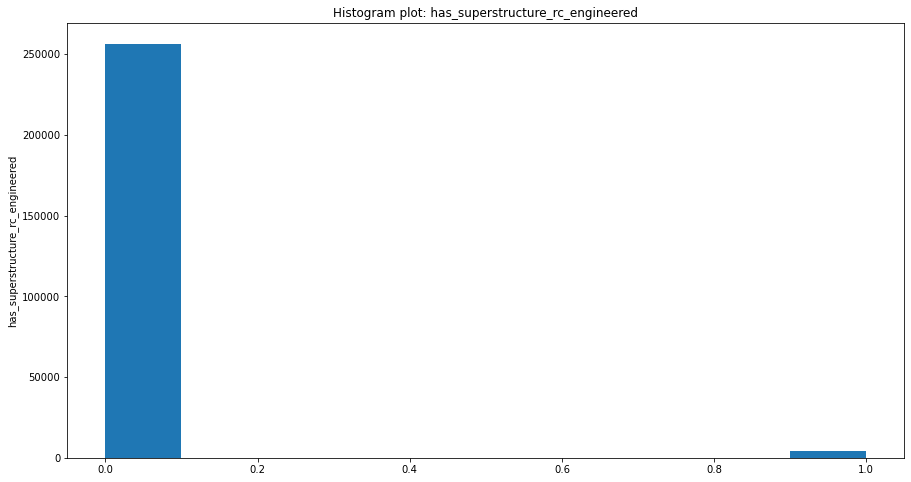

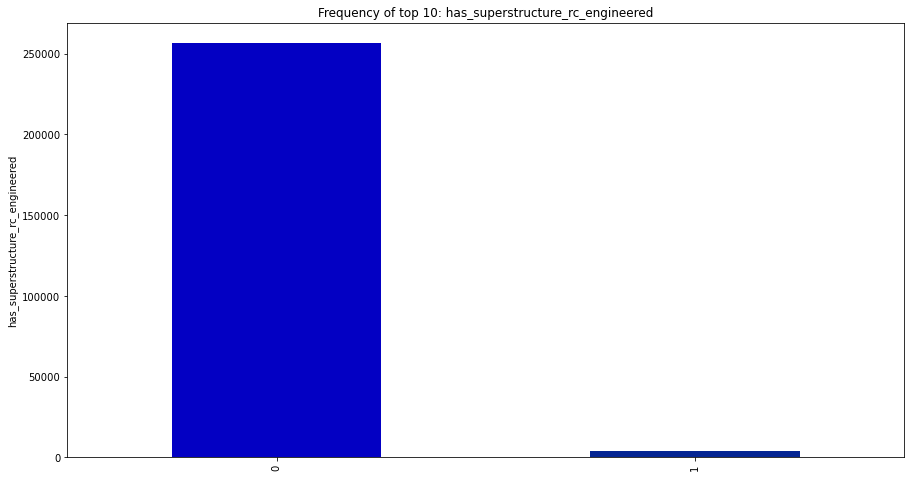

In [59]:
colInfo(combined_df['has_superstructure_rc_engineered'])

**has_superstructure_rc_engineered** looks good.

In [60]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_other'].value_counts()

0    256696
1      3905
Name: has_superstructure_other, dtype: int64

In [61]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_other'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"256,696",98.50 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.01,-
Median,0.00,-


,Value Count,% Value Count
0,256696,98.501541
1,3905,1.498459


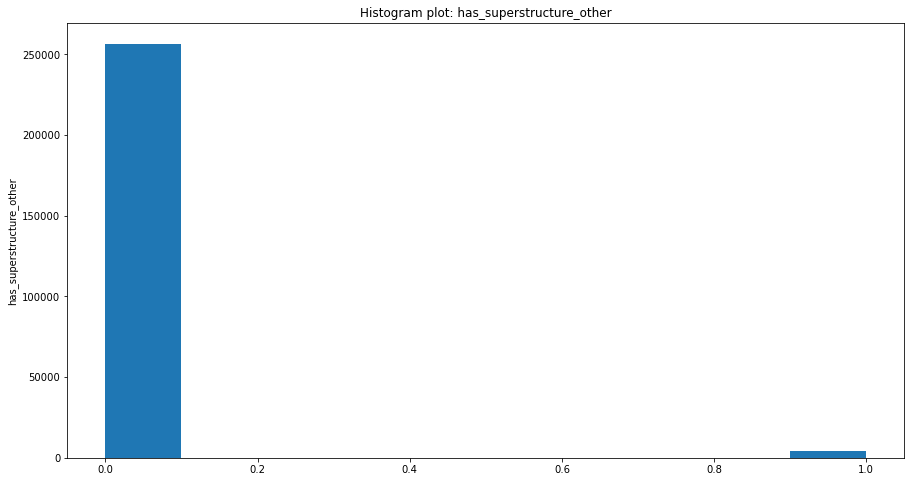

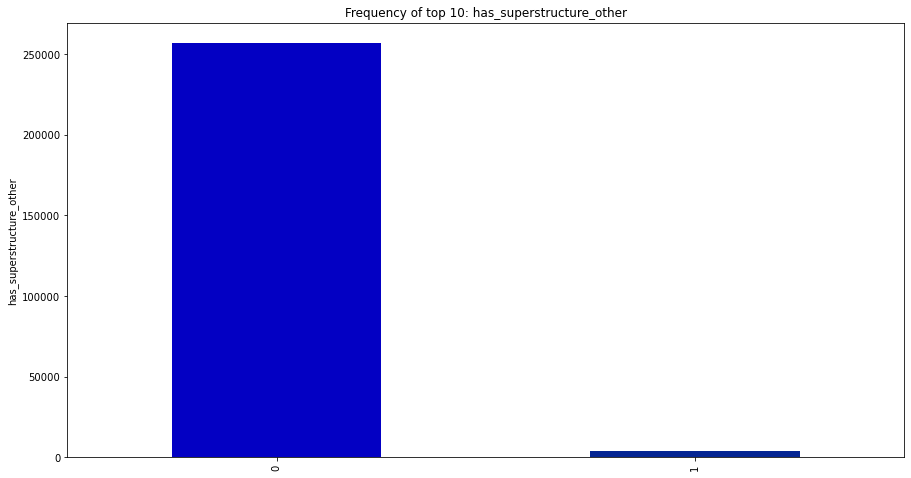

In [62]:
colInfo(combined_df['has_superstructure_other'])

**has_superstructure_other** looks good.

Great! our features are all 1 and 0 and there are no missing values. Everything looks good for my columns and I for sure know I am working with all **categorical data**. 

### **Features**

With our final dataset, let's do a run through on what the columns (features) we are working with. 

    
- **land_surface_condition**
    - surface condition of the land where the building was built. Possible values: n, o, t.
    
- **foundation_type**
    -  type of foundation used while building. Possible values: h, i, r, u, w. 

- **roof_type**
    - type of roof used while building. Possible values: n, q, x.

- **ground_floor_type**
    - type of the ground floor. Possible values: f, m, v, x, z.

- **has_superstructure_adobe_mud**
    - Indicates if the superstructure was made of Adobe/Mud.

- **has_superstructure_mud_mortar_stone**
    - Indicates if the superstructure was made of Mud Mortar - Stone.

- **has_superstructure_stone_flag**
    - Indicates if the superstructure was made of Stone.
    
- **has_superstructure_cement_mortar_stone**
    - Indicates if the superstructure was made of Cement Mortar - Stone.

- **has_superstructure_mud_mortar_brick**
    - Indicates if the superstructure was made of Mud Mortar - Brick.

- **has_superstructure_cement_mortar_brick**
    - Indicates if the superstructure was made of Cement Mortar - Brick.

- **has_superstructure_timber**
    - Indicates if the superstructure was made of Timber.

- **has_superstructure_bamboo**
    - Indicates if the superstructure was made of Bamboo.
    
- **has_superstructure_rc_non_engineered**
    - Indicates if the superstructure was made of non-engineered reinforced concrete.

- **has_superstructure_rc_engineered**
    -  Indicates if the superstructure was made of engineered reinforced concrete.

- **has_superstructure_other**
    - Indicates if the superstructure was made of any other material.

- **damage_grade (Target)**
    - Represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:
        - **1** represents low damage.
        - **2** represents medium damage.
        - **3** represents almost complete destruction.

### **Note**

One thing you should notice is that my target column **damage_grade** is only listed as values of 1, 2, or 3. I am going to move on and make a **Classification Model** for my studies as my targets are discrete intervals. This is the reason why I will be moving on and using specific approaches with my modeling.  

I am finished with my data cleaning and ready to move onto the next step!

# 2. Pre-Processing 

Since my data is cleaned up, let me look at the types of my data and see what I am working with.

In [63]:
#Checking types of data we are working with.
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   land_surface_condition                  260601 non-null  object
 2   foundation_type                         260601 non-null  object
 3   roof_type                               260601 non-null  object
 4   ground_floor_type                       260601 non-null  object
 5   has_superstructure_adobe_mud            260601 non-null  int64 
 6   has_superstructure_mud_mortar_stone     260601 non-null  int64 
 7   has_superstructure_stone_flag           260601 non-null  int64 
 8   has_superstructure_cement_mortar_stone  260601 non-null  int64 
 9   has_superstructure_mud_mortar_brick     260601 non-null  int64 
 10  has_superstructure_cement_mortar_brick  260601 non-null 

In [64]:
#Pulling up our dataframe just for sanity check
combined_df

,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,6,t,r,n,f,1,1,0,0,0,0,0,0,0,0,0,3
1,8,o,r,n,x,0,1,0,0,0,0,0,0,0,0,0,2
2,21,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
3,22,t,r,n,f,0,1,0,0,0,0,1,1,0,0,0,2
4,11,t,r,n,f,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,n,r,n,f,0,1,0,0,0,0,0,0,0,0,0,2
260597,17,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
260598,17,t,r,q,f,0,1,0,0,0,0,0,0,0,0,0,3
260599,26,t,r,x,v,0,0,0,0,0,1,0,0,0,0,0,2


It looks like I am working with all categorical data because my other columns are all 1 & 0's. That means I will not be working with any numerical data. 

In [65]:
#Because this is a multi-classification, we will be focusing on the median
#aka 50% of the dataset. In this case, majority of our answers are listed 
#as a damage grade of 2. 

#combined_df.describe()

### Train-Test Split

Before I do my train-test split, I need to create my **X** and **y** variables.

In [66]:
#Creating our X
X = combined_df.drop('damage_grade', axis=1)
#Creating our Target
y = combined_df['damage_grade']

In [67]:
#Doing our train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Great, we made a Train-Test split and now we can start making our pipeline.

We are first going to create functions that will grab the object labeled columns in our dataframe because I will need to **One Hot Encode** some of my columns. 

In [68]:
#Grabs all of my columns.
def grab_all_columns(df): 
    return df.select_dtypes(include=['object', 'float', 'int'])

In [69]:
#Converting funtions intro transformer (Object Values)
grab_everything = FunctionTransformer(grab_all_columns)

Awesome, we made a function transformer for our certain columns. Let's see how our target values are divided up.

In [70]:
#Let's check to see if there are any class imbalances 
y_train.value_counts(normalize= True)

2    0.569276
3    0.334653
1    0.096071
Name: damage_grade, dtype: float64

There is slight class imbalance but I will not use SMOTE for the time being. I will move forward and build my models and see what the values I recieve are and if needed, I will come back and use SMOTE on my data. 

### **Pipelines**

We are now going to start building the pipelines.

Like I mentioned earlier, we are only working with categorical data, so as of now I will only need to **One Hot Encode** certain columns that I have. 

In [71]:
#These are the columns that look like they have been One Hot Encoded already, and I will not need to run these through
#my pipelines. I wanted to keep them separated just for your viewing.
number_columns = ['has_superstructure_adobe_mud', 
                   'has_superstructure_mud_mortar_stone',
                  'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 
                  'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 
                  'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 
                 'has_superstructure_rc_engineered', 'has_superstructure_other' ]


#These are the columns that I will need to One Hot Encode in my pipeline.
categorical_columns = ['geo_level_1_id','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type']

#Our categorical pipeline 
categorical_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])


In [72]:
#We are now building our column transformers.
ct = ColumnTransformer(transformers = [('subpipe_cat', categorical_pipeline, categorical_columns)
], remainder='passthrough')

# Modeling

### **Dummy Model**

Great, we now have a pipeline and so let's go ahead and build our dummy model. We are now going to build a column transformer just for our dummy and our first simple model. Since we are working with only categorical data, I will be using the same ColumnTransformer for all of my models.

In [73]:
#I am building my pipeline for my dummy and my 1st simple model.
dummy_simple = Pipeline(steps=[
    ('ct', ct),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_train, y_train)

In [74]:
#building my y prediction for my f1 model.
y_preds_dummy = dummy_simple.predict(X_train)
y_preds_dummy

array([2, 2, 2, ..., 2, 2, 2])

In [75]:
#For the average, I ran through every option they gave me and micro gave me the best score.
f1_score(y_train, y_preds_dummy, average= 'micro')

0.5692760296751087

,Scores
,
F1 Macro,0.2418
F1 Micro,0.5693


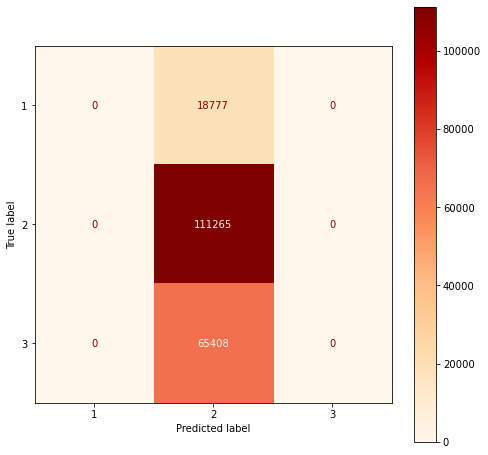

In [76]:
#Running my function to get all of my scores and getting a confusion matrix.
modelReport(dummy_simple,X_train,y_train)

Our dummy gives us an F1 Score of **56.93%**. This is the baseline. My model just has to do better than this score.

### First Simple Model (Logistic Regression)

We are going to be building a **Logistic Regression** for our first model.

,Scores
,
Accuracy,0.6646
F1 Macro,0.5768
F1 Weighted,0.6513
F1 Micro,0.6646


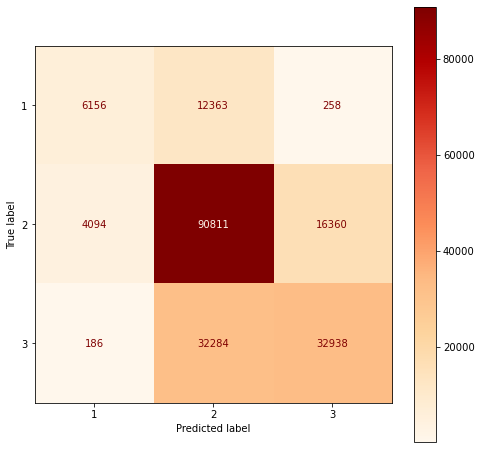

In [153]:
logistic_regression_pipeline = Pipeline([
    ('ct', ct),
    ('log_reg', LogisticRegression(random_state=42, n_jobs=-4))
])
logistic_regression_pipeline.fit(X_train, y_train)
modelReport(logistic_regression_pipeline,X_train,y_train)

We got a score of **66%** for our F1 Score. It's okay, but let me run other models and see if I can get any higher scores or not.

### Random Forest

Since I am working with classification data, I will be using a random forest model to see what my F1 Score will be.

,Scores
,
Accuracy,0.6770
F1 Macro,0.6098
F1 Weighted,0.6700
F1 Micro,0.6770


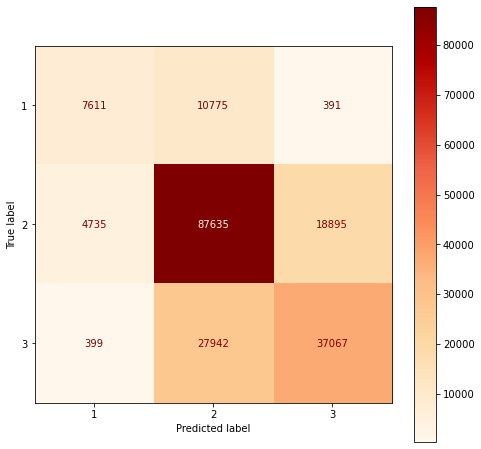

In [154]:
random_forest_pipeline = Pipeline([
    ('ct',ct),
   ('rfc',RandomForestClassifier(random_state=42,n_jobs= -2))
])

random_forest_pipeline.fit(X_train,y_train)
modelReport(random_forest_pipeline,X_train,y_train)


An improvement is an improvement, but my random forest model did only 1% better than my logistic regression.

I am not happy with this score. Let's run another model and see what my score is.

### XG Boosting 

In [77]:
XGBRF_model_pipe = Pipeline([
    ('ct',ct),
   ('xg',xgboost.XGBRFClassifier(random_state=42,n_jobs=-2))
])

,Scores
,
F1 Macro,0.5322
F1 Micro,0.6604


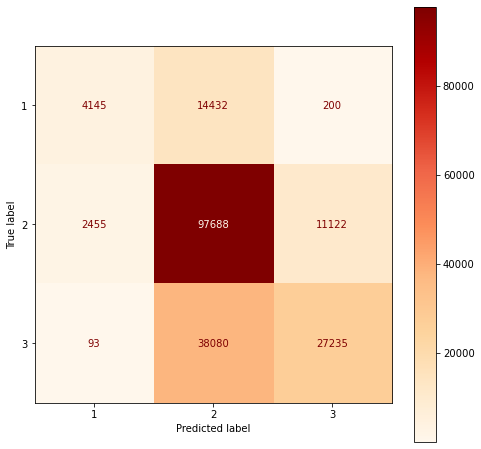

In [78]:
XGBRF_model_pipe.fit(X_train,y_train)
modelReport(XGBRF_model_pipe,X_train,y_train)

I got a score of 66% for my **XGBoost**, I honestly do not like this score and will try to move on to another model and see what happens.

### K-Nearest Neighbors

,Scores
,
F1 Macro,0.5766
F1 Micro,0.6401


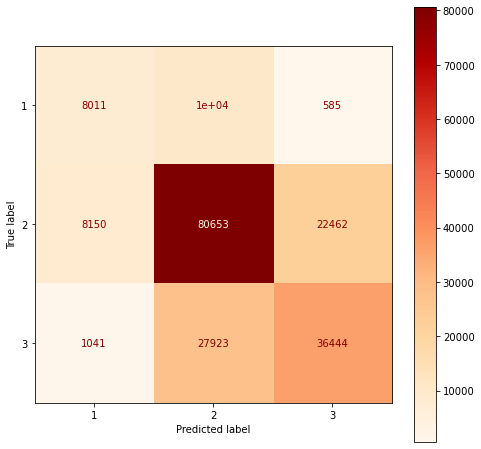

In [80]:
knn_model_pipe = Pipeline([
    ('ct',ct),
   ('knn',KNeighborsClassifier(n_jobs=-2))
])

knn_model_pipe.fit(X_train,y_train)
modelReport(knn_model_pipe,X_train,y_train)

Okay, **K-Nearest Neighbors** scores are awful too.

I could hypertune these models but I am not happy with these baseline scores. I want to pull up a heatmap to see if there is any features that I could bring back.

### Heatmap 

### Hypertuning on our model

We will be Hypertuning our Logistic Regression model.

In [273]:
params = {}
#The different parameters I will be working with.
params['log_reg__C'] = [0.1, 50, 100,500]
params['log_reg__max_iter'] = [50,100, 150,200]
params['log_reg__solver'] = ['lbfgs', 'sag', 'saga','newton-cg']

#Doing the grid search.
log_reg_grid_search = GridSearchCV(estimator=logistic_regression_pipeline,
                           param_grid=params,
                           cv=5,
                           n_jobs=-2,
                           scoring=[ 'accuracy','f1_macro', 'f1_weighted', 'f1_micro'],
                           refit='f1_micro',
                           return_train_score=True)
log_reg_grid_search.fit(X_train, y_train)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['geo_level_1_id',
                                                                          'land_surface_condition',
                                                                          'foundation_type',
                                                                          'roof_type',
                                            

In [274]:
#Printing out the results of the grid search.
prettyPrintGridCVResults(log_reg_grid_search)

,Rank (By Accuracy),Mean Test Accuracy,mean_test_f1_weighted,mean_test_f1_macro,param_log_reg__C,param_log_reg__max_iter,param_log_reg__solver
Mean Test F1-Score (micro),,,,,,,
0.6648,1,0.6648,0.6514,0.5769,100,50,sag
0.6647,4,0.6647,0.6513,0.5766,500,200,newton-cg
0.6647,21,0.6647,0.6512,0.5764,100,50,saga
0.6647,21,0.6647,0.6512,0.5764,50,150,sag
0.6647,21,0.6647,0.6512,0.5764,50,150,saga
...,...,...,...,...,...,...,...
0.6646,56,0.6646,0.6508,0.5750,0.1,200,sag
0.6646,48,0.6646,0.6508,0.5750,0.1,200,saga
0.6646,48,0.6646,0.6508,0.5750,0.1,200,newton-cg


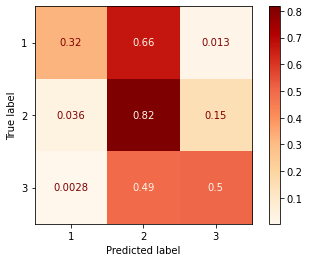

In [275]:
#This is a normalized (percentage) confusion matrix
disp = ConfusionMatrixDisplay.from_estimator( logistic_regression_pipeline,
        X_train,
        y_train,
        display_labels=logistic_regression_pipeline.classes_,
        cmap='OrRd',
        normalize='true')

Okay, even after hypertuning and gridsearching the model, my model barely made an improvement from the dummy model. It was a 1% improvement. This is telling me that this model is probably not the best fit for my data and I need to move on and try a different model.

### Random Forest

We are going to be working Random Forest and see what our baseline results are.

,Scores
,
Accuracy,0.6770
F1 Macro,0.6098
F1 Weighted,0.6700
F1 Micro,0.6770


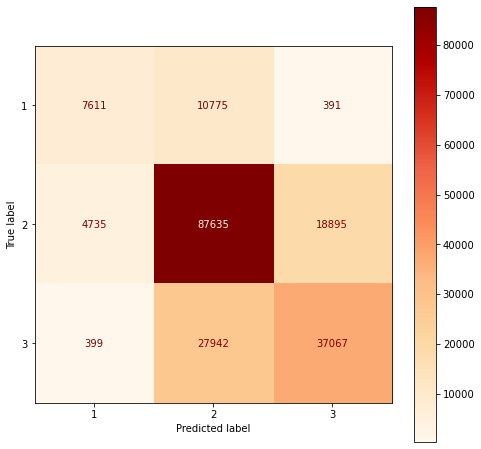

In [276]:
random_forest_pipeline = Pipeline([
    ('ct',ct),
   ('rfc',RandomForestClassifier(random_state=42,n_jobs= -2))
])

random_forest_pipeline.fit(X_train,y_train)
modelReport(random_forest_pipeline,X_train,y_train)


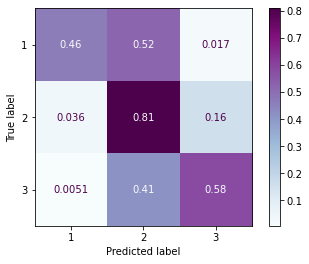

In [277]:
disp = ConfusionMatrixDisplay.from_estimator( random_forest_pipeline,
        X_train,
        y_train,
        display_labels=random_forest_pipeline.classes_,
        cmap='BuPu',
        normalize='true')

In [145]:
XGBRF_model_pipe = Pipeline([
    ('ct',ct),
   ('xg',xgboost.XGBRFClassifier(random_state=42,n_jobs=-2))
])

,Scores
,
Accuracy,0.5792
F1 Macro,0.3613
F1 Weighted,0.4559
F1 Micro,0.5792


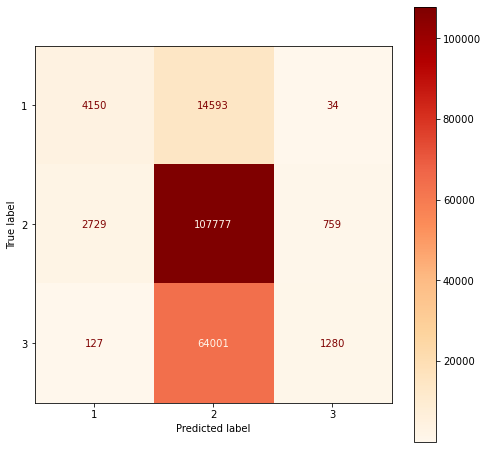

In [146]:
XGBRF_model_pipe.fit(X_train,y_train)
modelReport(XGBRF_model_pipe,X_train,y_train)


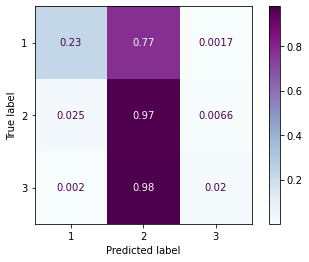

In [151]:
disp = ConfusionMatrixDisplay.from_estimator( XGBRF_model_pipe,
        X_train,
        y_train,
        display_labels=XGBRF_model_pipe.classes_,
        cmap='BuPu',
        normalize='true')

In [305]:
params = {}
params['rfc__criterion'] = ['gini','entropy']
params['rfc__n_estimators'] = [100, 150]
params['rfc__max_depth'] = [5,10,15, 20, 25, 30, 50, 100]
#params['rfc__max_leaf_nodes']=[2500,3000]


rfc_gs1 = GridSearchCV(estimator=random_forest_pipeline,
                           param_grid=params,
                           cv=5,
                           n_jobs=-2,
                           scoring=[ 'accuracy','f1_macro', 'f1_weighted', 'f1_micro'],
                           refit='f1_micro',
                           return_train_score=True)

rfc_gs1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['geo_level_1_id',
                                                                          'land_surface_condition',
                                                                          'foundation_type',
                                                                          'roof_type',
                                            

In [306]:
rfc_gs1.best_params_

{'rfc__criterion': 'gini', 'rfc__max_depth': 25, 'rfc__n_estimators': 150}

In [307]:
prettyPrintGridCVResults(rfc_gs1)

,Rank (By Accuracy),Mean Test Accuracy,mean_test_f1_weighted,mean_test_f1_macro,param_rfc__criterion,param_rfc__max_depth,param_rfc__n_estimators
Mean Test F1-Score (micro),,,,,,,
0.6775,2,0.6775,0.6647,0.6025,entropy,25,150
0.6775,1,0.6775,0.6644,0.6015,gini,25,150
0.6774,3,0.6774,0.6646,0.6025,entropy,25,100
0.6773,4,0.6773,0.6643,0.6017,gini,25,100
0.6772,5,0.6772,0.6654,0.6035,entropy,30,150
0.6772,5,0.6772,0.6652,0.6031,gini,30,150
0.6771,7,0.6771,0.6651,0.6028,gini,30,100
0.6771,8,0.6771,0.6702,0.6099,entropy,100,100
0.6770,11,0.6770,0.6701,0.6098,entropy,100,150


In [308]:
rfc_gs1.best_params_

{'rfc__criterion': 'gini', 'rfc__max_depth': 25, 'rfc__n_estimators': 150}

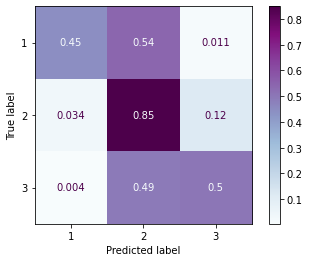

In [309]:
disp = ConfusionMatrixDisplay.from_estimator( rfc_gs1.best_estimator_,
        X_train,
        y_train,
        display_labels=rfc_gs1.best_estimator_.classes_,
        cmap='BuPu',
        normalize='true')

In [ ]:
# class ModelWithCV():
#     '''Structure to save the model and more easily see its crossvalidation'''
    
#     def __init__(self, model, model_name, X, y, cv_now=True):
#         self.model = model
#         self.name = model_name
#         self.X = X
#         self.y = y
#         # For CV results
#         self.cv_results = None
#         self.cv_mean = None
#         self.cv_median = None
#         self.cv_std = None
#         #
#         if cv_now:
#             self.cross_validate()
        
#     def cross_validate(self, X=None, y=None, kfolds=10):
#         '''
#         Perform cross-validation and return results.
        
#         Args: 
#           X:
#             Optional; Training data to perform CV on. Otherwise use X from object
#           y:
#             Optional; Training data to perform CV on. Otherwise use y from object
#           kfolds:
#             Optional; Number of folds for CV (default is 10)  
#         '''
        
#         cv_X = X if X else self.X
#         cv_y = y if y else self.y

#         self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
#         self.cv_mean = np.mean(self.cv_results)
#         self.cv_median = np.median(self.cv_results)
#         self.cv_std = np.std(self.cv_results)

        
#     def print_cv_summary(self):
#         cv_summary = (
#         f'''CV Results for `{self.name}` model:
#             {self.cv_median:.5f} ± {self.cv_std:.5f} accuracy
#         ''')
#         print(cv_summary)

        
#     def plot_cv(self, ax):
#         '''
#         Plot the cross-validation values using the array of results and given 
#         Axis for plotting.
#         '''
#         ax.set_title(f'CV Results for `{self.name}` Model')
#         # Thinner violinplot with higher bw
#         sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
#         sns.swarmplot(
#                 y=self.cv_results,
#                 color='orange',
#                 size=10,
#                 alpha= 0.8,
#                 ax=ax
#         )

#         return ax
    
#     def print_summary(self):
#         roc = plot_roc_curve(self.model, self.X , self.y);
#         cm = plot_confusion_matrix(self.model, self.X, self.y);
#         preds = self.model.predict(self.X)
#         f1_ = f1_score(self.y, preds)
#         cv_summary = (
#             f'''CV Results for `{self.name}` model:
#             {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
#         ''')

#         print(f' \n  f1_score is {f1_}', cv_summary ,cm, roc)      

### Classification Metrics

The choice of evaluation metric can have a major impact on how well your model serves its intended goals. 